# Exploratory Data Analysis of AirBnB Listings in London, England

## 0. Initial setup
### Run this section first to ensure the correct functionality of the rest of the script.

First, import the required libraries and set the maximum display of data tables

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


Then, import the corresponding datasets

In [8]:
lsts_url = "./data/listings.csv.gz"
cldr_url = "./data/calendar.csv.gz"
revs_url = "./data/reviews.csv.gz"

lsts_df = pd.read_csv(lsts_url)
cldr_df = pd.read_csv(cldr_url)
revs_df = pd.read_csv(revs_url)

# 1. Univariate Analysis
## This section will show relevant information regarding single variables of the dataset, which will help in choosing the most relevant to the final conclusions and understanding their behavior.

### 1.1 Neighbourhoods
Here, we list each of the unique neighbourhoods in the database

In [121]:
nh_lst = lsts_df["neighbourhood_cleansed"].unique()
print(nh_lst)

['Westminster' 'Hammersmith and Fulham' 'Islington'
 'Kensington and Chelsea' 'Hackney' 'Lambeth' 'Barking and Dagenham'
 'Southwark' 'Wandsworth' 'Barnet' 'Camden' 'Hillingdon' 'Tower Hamlets'
 'Richmond upon Thames' 'Haringey' 'Greenwich' 'Merton' 'Brent' 'Newham'
 'Hounslow' 'Croydon' 'Waltham Forest' 'Lewisham' 'Enfield'
 'City of London' 'Ealing' 'Bromley' 'Havering' 'Harrow'
 'Kingston upon Thames' 'Redbridge' 'Bexley' 'Sutton']


Then, we organize the neighbourhoods by number of listings available in each one. This will help in performing a Pareto analysis to select the neighbourhoods that represent approximately 80% of listings:

15


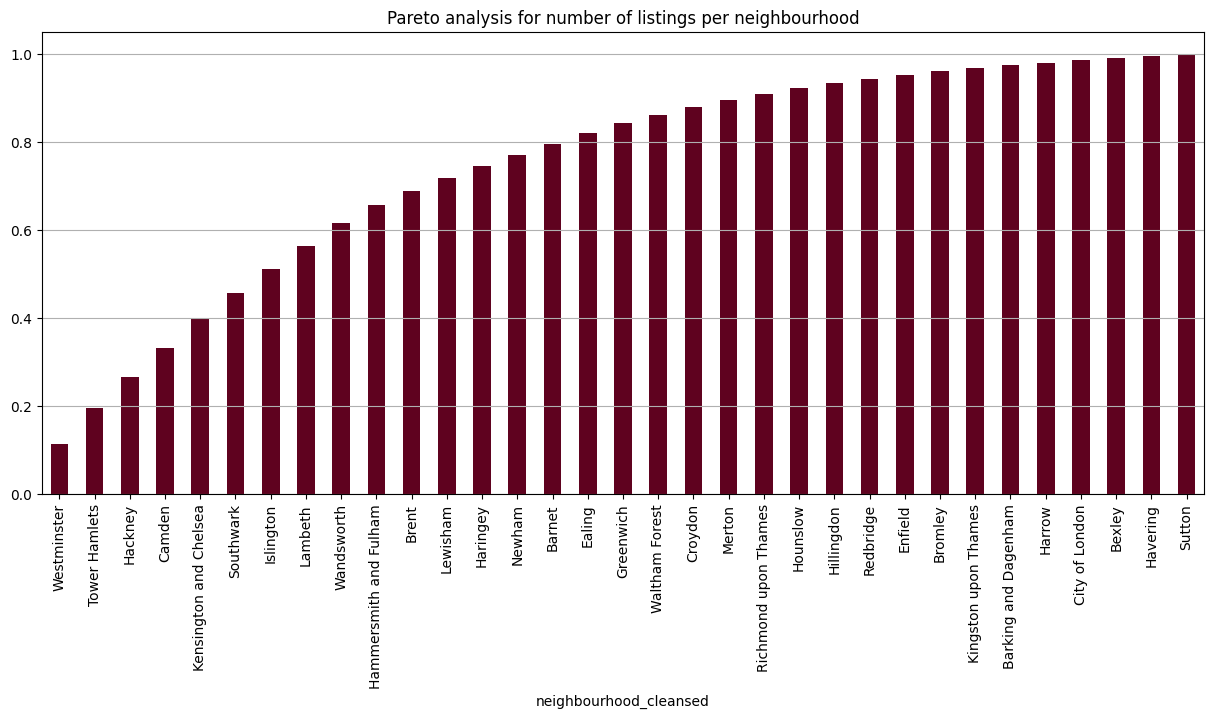

In [115]:
nh_ct = []                                                                                  #Vector for count of listings in each neighbourhood

nh_cfreq = lsts_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

plt.figure(figsize=(15,6))
nh_cfreq.plot(kind='bar', color='#5f021f')
plt.title("Pareto analysis for number of listings per neighbourhood")
plt.grid(axis='y')
plt.show

nh_rep = nh_cfreq.loc[nh_cfreq < 0.8].index.tolist()
nh_nrep = nh_cfreq.loc[nh_cfreq >= 0.8].index.tolist()

print(len(nh_rep))

Lastly, we will map the most representative neighbourhoods by their coordinates. Note how the numbers are greater (darker colour) in the most central neighbourhoods in the city. The listings in neighbourhoods that are considered "not relevant" are coloured in grey.

(51.275, 51.7)

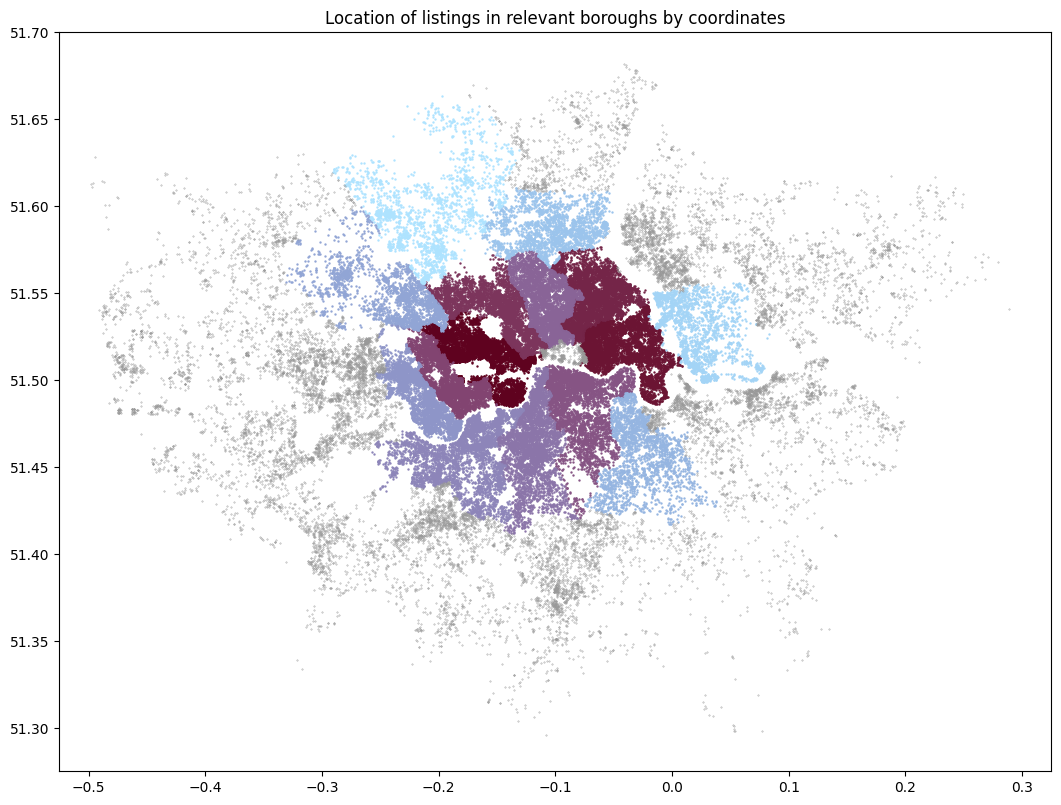

In [212]:
x_mtx_r = []                                                                                            #Vector for longitude coordinates for listings in each relevant neighbourhood
x_mtx_nr = []                                                                                           #Vector for longitude coordinates for listings in each non-relevant neighbourhood
y_mtx_r = []                                                                                            #Vector for latitude coordinates for listings in each relevant neighbourhood
y_mtx_nr = []                                                                                           #Vector for latitude coordinates for listings in each non-relevant neighbourhood
c_r = ['#5f021f','#6b1433','#742548','#7c355c','#824471','#865484','#896497','#8b75a9','#8d85b9',\
    '#8e95c8','#91a5d5','#95b5e1','#9bc4ec','#a3d4f6','#aee3ff']

for r in nh_rep:
    x_mtx_r.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == r]['longitude'])
    y_mtx_r.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == r]['latitude'])

for nr in nh_nrep:
    x_mtx_nr.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == nr]['longitude'])
    y_mtx_nr.append(lsts_df.loc[lsts_df['neighbourhood_cleansed'] == nr]['latitude'])

fig = plt.figure()
w,h = fig.get_size_inches()
fig.set_size_inches(w*2,h*2)
plt.title("Location of listings in relevant boroughs by coordinates")

for i in range(len(x_mtx_r)):
    plt.scatter(x_mtx_r[i],y_mtx_r[i],s=0.5,color=c_r[i])

for j in range(len(x_mtx_nr)):
    plt.scatter(x_mtx_nr[j],y_mtx_nr[j],s=0.1,color='#999999')

plt.xlim([-0.525,0.325])
plt.ylim([51.275,51.7])

### 1.2 Prices
For the prices, we begin by representing the listings in a fixed number of bins. To do this, we start by converting the price data into operable numbers

In [133]:
lsts_df["price_conv"] = lsts_df["price"].str.replace('[$,]','',regex=True).astype(float)

Then, we define the number of bins and plot the frequency of listings that correspond to each bin. To eliminate possible outliers, we first eliminate outliers by ignoring prices that are 3 standard deviations apart from the mean of the values.

[]

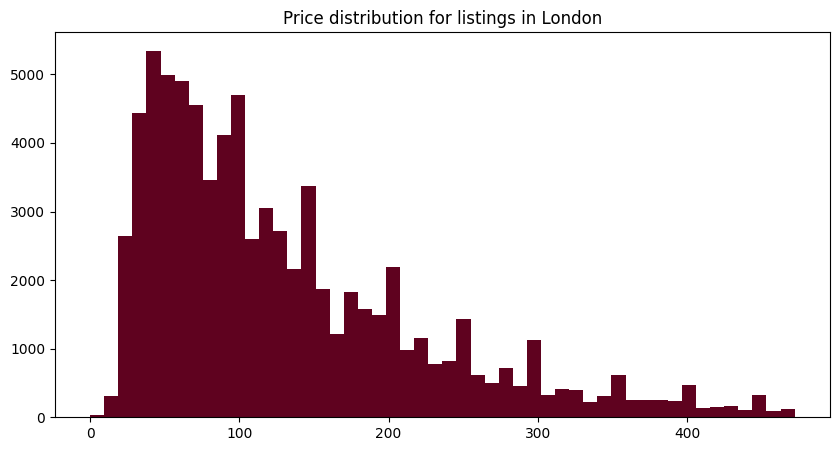

In [141]:
q1 = lsts_df["price_conv"].quantile(0.25)
q3 = lsts_df["price_conv"].quantile(0.75)
iqr = q3-q1

plt.figure(figsize=(10,5))
plt.hist(lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"],bins=50,color='#5f021f')
plt.title("Price distribution for listings in London")
plt.plot()

We can also find relevant data for the listings (ignoring the outliers removed in the previous step) by looking at a box plot. 
- The vertical yellow line represents the median value. 
- The green triangle represents the mean.
- The vertical edges of the box correspond to the 25th percentile and 75th percentile, respectively.

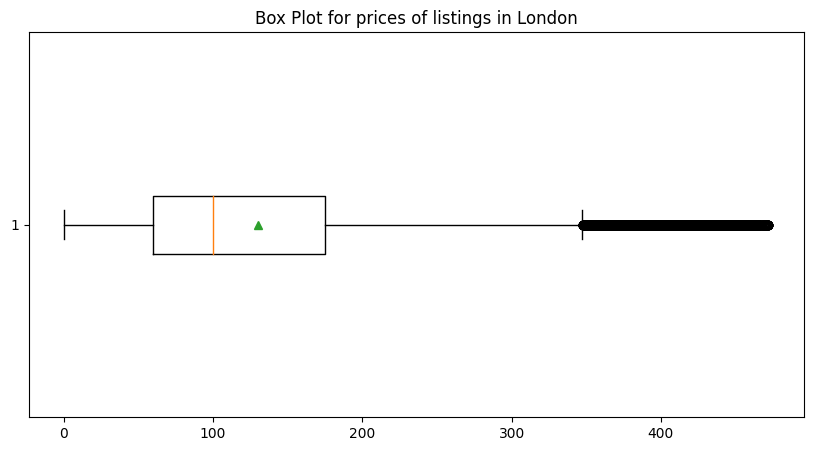

In [208]:
plt.figure(figsize=(10,5))
plt.boxplot(lsts_df.loc[lsts_df["price_conv"] <= (q3 + 2*iqr)]["price_conv"], showmeans=True, vert=False)
plt.title("Box Plot for prices of listings in London")
plt.show()

### 1.2 Property features
Now, we will take a look at how the listings in the city are distributed in terms of their features (type of room available, number of bedrooms, number of bathrooms, etc.). This will help in discovering any trends in composition of properties, which we can later compare to availability, prices, and bookings, to figure out the most sought-after features.

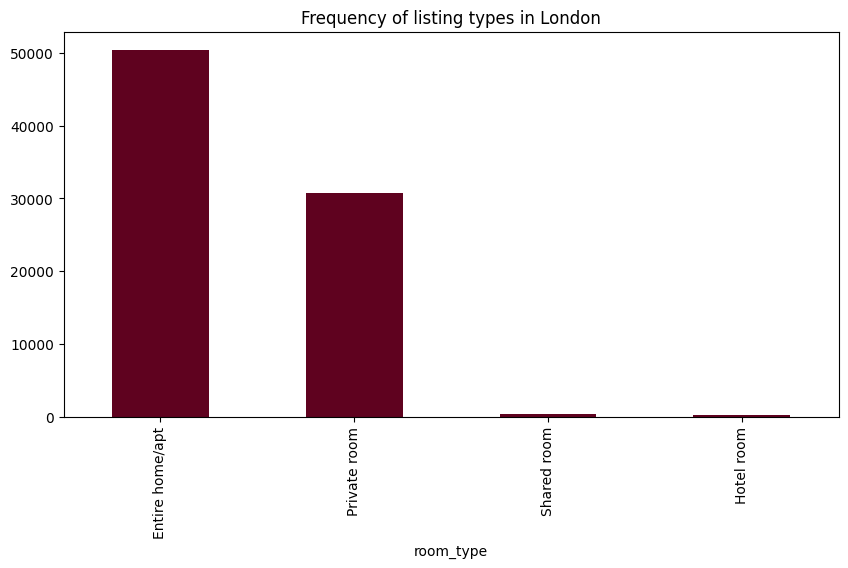

In [158]:
plt.figure(figsize=(10,5))
lsts_df["room_type"].value_counts().plot(kind="bar",color="#5f021f")
plt.title("Frequency of listing types in London")
plt.show()

To get better insight on the type of property that is mostly available in London, we now display the property types as stacked bars, with colors representing the maximum number of people that can be accommodated per type of listing.

Text(0.5, 1.0, 'Properties by type and maximum accommodation')

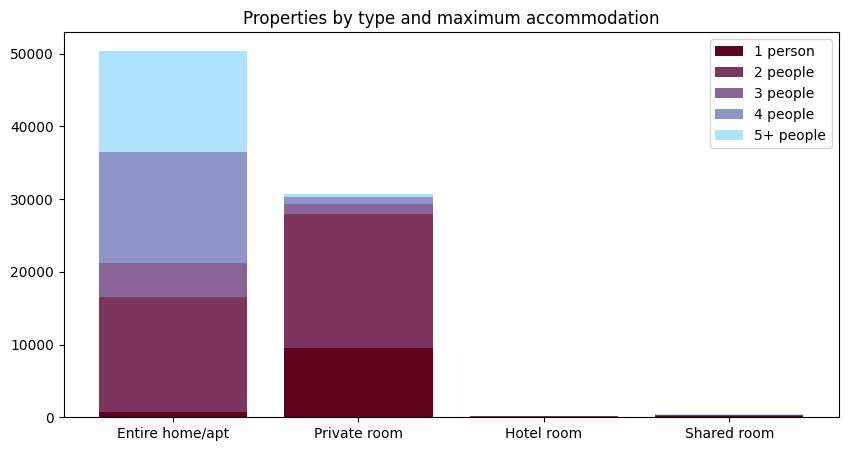

In [209]:
x = lsts_df["room_type"].unique()
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []

for rt in lsts_df["room_type"].unique():
    y1.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==1)]))
    y2.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==2)]))
    y3.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==3)]))
    y4.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]==4)]))
    y5.append(len(lsts_df.loc[(lsts_df["room_type"]==rt) & (lsts_df["accommodates"]>=5)]))

plt.figure(figsize=(10,5))
plt.bar(x, y1, color="#5f021f")
plt.bar(x, y2, bottom=np.array(y1), color="#7c355c")
plt.bar(x, y3, bottom=np.array(y1)+np.array(y2), color="#896497")
plt.bar(x, y4, bottom=np.array(y1)+np.array(y2)+np.array(y3), color="#8e95c8")
plt.bar(x, y5, bottom=np.array(y1)+np.array(y2)+np.array(y3)+np.array(y4), color="#aee3ff")
plt.legend(["1 person","2 people","3 people","4 people","5+ people"])
plt.title("Properties by type and maximum accommodation")